### K-mean clustring algoritm 

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
x,y=make_blobs(n_samples=1000, n_features=2, centers=3, random_state=42)

In [3]:
x

array([[-6.59633932, -7.13901457],
       [-6.13753182, -6.58081701],
       [ 5.19820575,  2.04917508],
       ...,
       [ 3.69047995,  4.60555175],
       [ 4.03036663,  1.78619838],
       [-7.44179522, -7.08933147]])

In [4]:
x.shape

(1000, 2)

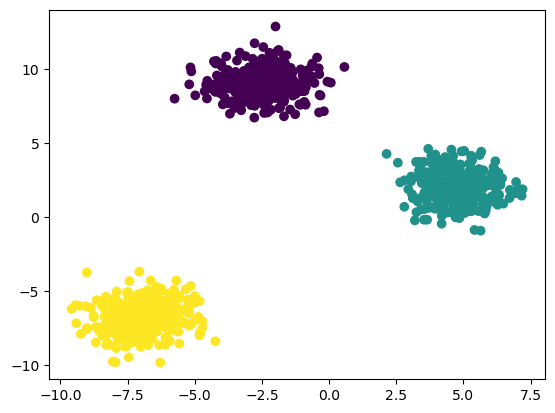

In [8]:
plt.scatter(x[:,0], x[:,1], c=y)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25, random_state=42)

In [11]:
x_train.shape, x_test.shape

((750, 2), (250, 2))

In [12]:
from sklearn.cluster import KMeans

In [14]:
wcss=[]
for k in range(1,11):
    kmean=KMeans(n_clusters=k, init='k-means++')
    kmean.fit(x_train)
    wcss_value=kmean.inertia_
    wcss.append(wcss_value)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [15]:
wcss

[49670.93926058018,
 14338.002336269468,
 1491.468736161074,
 1313.9247118205585,
 1139.1941857517995,
 968.2811723678179,
 872.244191822171,
 763.2495417584514,
 667.8771619584376,
 611.3075047263343]

Text(0, 0.5, 'WCSS')

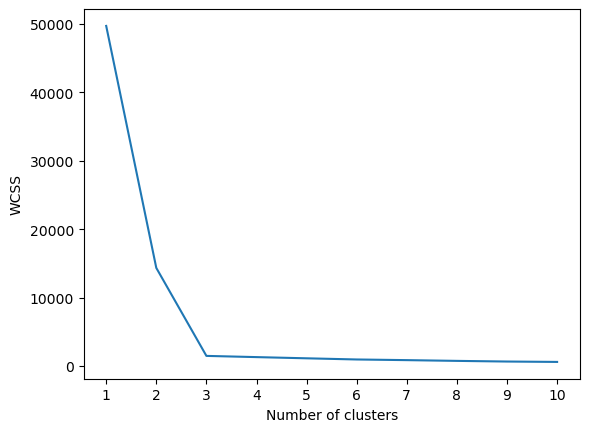

In [18]:
# plot elbow curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [19]:
kmean=KMeans(n_clusters=3, init='k-means++')

In [20]:
y_pred=kmean.fit_predict(x_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


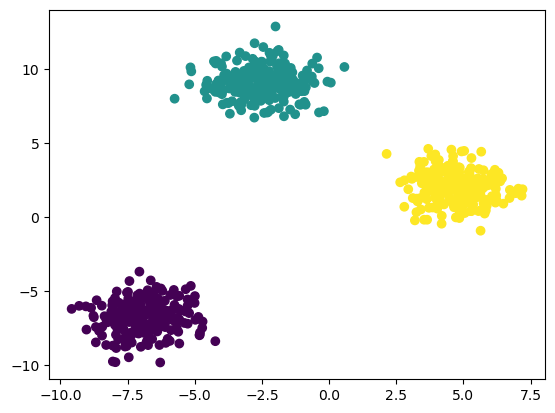

In [22]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_pred)

In [23]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [25]:
from kneed import KneeLocator

In [26]:
kl=KneeLocator(range(1,11), wcss ,curve='convex', direction='decreasing')

In [27]:
kl.elbow

3

In [28]:
# Performance metrics

In [29]:
from sklearn.metrics import silhouette_score

In [32]:
silhouette_coefficent=[ ]
for k in range(2,11):
    kmean=KMeans(n_clusters=k,init='k-means++')
    kmean.fit(x_train)
    score=silhouette_score(x_train, kmean.labels_)
    silhouette_coefficent.append(score)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [33]:
silhouette_coefficent

[0.7015587783702529,
 0.8417883929960392,
 0.6704565108639179,
 0.5063871242750335,
 0.3151102570972252,
 0.3296046805858394,
 0.33247152967476884,
 0.3301135298178327,
 0.33181222264862]

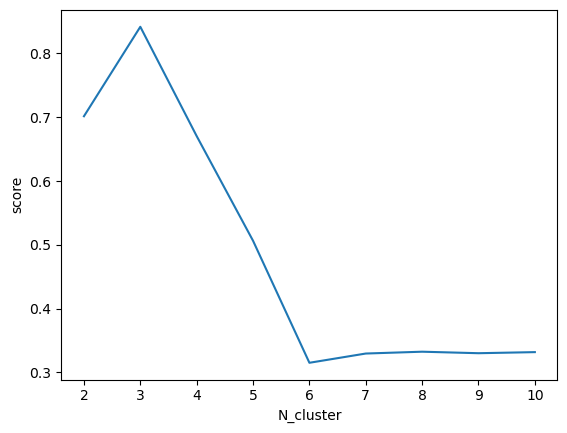

In [35]:
plt.plot(range(2,11), silhouette_coefficent)
plt.xlabel("N_cluster")
plt.ylabel("score")
plt.show()